# Calculating Change in Voltage of a Nueron 

### The voltage change in a neuron with no ion channels can be modeled as:

$$\frac{dv}{dt} = \frac{i}{C}$$


### But, this not not account for the fact that neurons have ion channels, which can be thought of as resistors. With this in mind, we can moddel an ion channel as:

$$I_X = G_x \times (V_M - E_X)$$

### where I_X is the current through an ion channel, G_X is the conductance of the ion channel, V_M is the membrane potential, and E_X is the reversal potential of the ion channel

### Importing libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### Computation Code

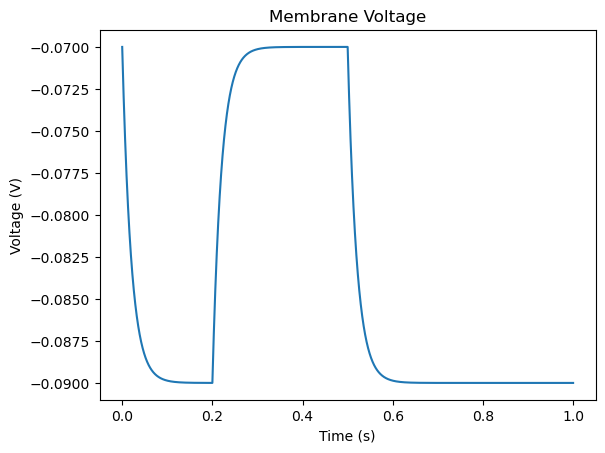

In [4]:
# Basic simulation Parameters
dt = 10E-6 # Time step

# Basic Cell Parameters
Cm = 100E-12 # Membrane capacitance = 100 pF
v_rest = -70E-3 # Resting potential = -70 mV
Gk = 5E-9 # Leak conductance = 5 nS
Ek = -90E-3 # Leak reversal potential = -90 mV

# Injected Current Parameters
current_magnitude = 100E-12 # 100 pA

# Injected Current, 0.2 seocnd of 0 current, 0.3 seocnd of some current, and 0.5 second of 0 current
i_inj = np.concatenate( (np.zeros([round(0.2/dt),1]),
                         current_magnitude*np.ones([round(0.3/dt), 1]),
                         np.zeros([round(0.5/dt), 1])) )

# Preallocate the voltage array
v_out = np.zeros([len(i_inj), 1])

# Computation
for t in range(np.size(v_out)):
    if t == 0:
        v_out[t] = v_rest
    else:
        i_ion = Gk * (v_out[t-1] - Ek)
        i_cap = i_inj[t] - i_ion
        dv = (i_cap / Cm)
        v_out[t] = v_out[t-1] + dv*dt
        
# Plotting
t_vec = np.arange(0, len(v_out)*dt, dt)
plt.plot(t_vec, v_out)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Membrane Voltage')
plt.show()